In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

df = pd.read_csv("10y_USD_PKR Historical_Data.csv", sep=",")
df

,Date,Price,Open,High,Low,Change %
0,"May 24, 2022",200.10,200.625,201.360,199.650,-0.15%
1,"May 23, 2022",200.40,200.050,201.210,199.500,0.15%
2,"May 20, 2022",200.10,199.825,201.255,199.250,0.20%
3,"May 19, 2022",199.70,198.450,201.220,198.150,1.11%
4,"May 18, 2022",197.50,196.750,198.670,195.825,0.51%
...,...,...,...,...,...,...
3213,"Jan 06, 2012",90.70,90.200,90.750,90.200,0.28%
3214,"Jan 05, 2012",90.45,90.200,90.530,90.150,0.17%
3215,"Jan 04, 2012",90.30,90.060,90.440,90.050,0.16%
3216,"Jan 03, 2012",90.16,89.770,90.300,89.770,0.32%


In [2]:
df.shape

(3218, 6)

In [3]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Price']=pd.to_numeric(df['Price'], errors='coerce')

In [4]:
df.head()

,Date,Price,Open,High,Low,Change %
0,2022-05-24,200.1,200.625,201.360,199.650,-0.15%
1,2022-05-23,200.4,200.050,201.210,199.500,0.15%
2,2022-05-20,200.1,199.825,201.255,199.250,0.20%
3,2022-05-19,199.7,198.450,201.220,198.150,1.11%
4,2022-05-18,197.5,196.750,198.670,195.825,0.51%


In [5]:
df.shape

(3218, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3218 non-null   datetime64[ns]
 1   Price     3218 non-null   float64       
 2   Open      3218 non-null   float64       
 3   High      3218 non-null   float64       
 4   Low       3218 non-null   float64       
 5   Change %  3218 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 151.0+ KB


In [7]:
df.describe()

,Price,Open,High,Low
count,3218.000000,3218.000000,3218.000000,3218.000000
mean,121.081013,121.081874,121.440726,120.721153
std,27.282306,27.394301,27.640350,27.093514
min,89.870000,89.700000,89.880000,89.700000
25%,101.870000,101.750000,101.936250,101.690000
50%,105.185000,105.150000,105.217500,105.100000
75%,152.417500,152.906250,153.390000,152.015000
max,200.400000,200.625000,201.360000,199.650000


In [8]:
df = df[['Date','Price']]

In [9]:
df

,Date,Price
0,2022-05-24,200.10
1,2022-05-23,200.40
2,2022-05-20,200.10
3,2022-05-19,199.70
4,2022-05-18,197.50
...,...,...
3213,2012-01-06,90.70
3214,2012-01-05,90.45
3215,2012-01-04,90.30
3216,2012-01-03,90.16


In [10]:
df = df.set_index("Date")
df = df.sort_index()
df

,Price
Date,
2012-01-02,89.87
2012-01-03,90.16
2012-01-04,90.30
2012-01-05,90.45
2012-01-06,90.70
...,...
2022-05-18,197.50
2022-05-19,199.70
2022-05-20,200.10


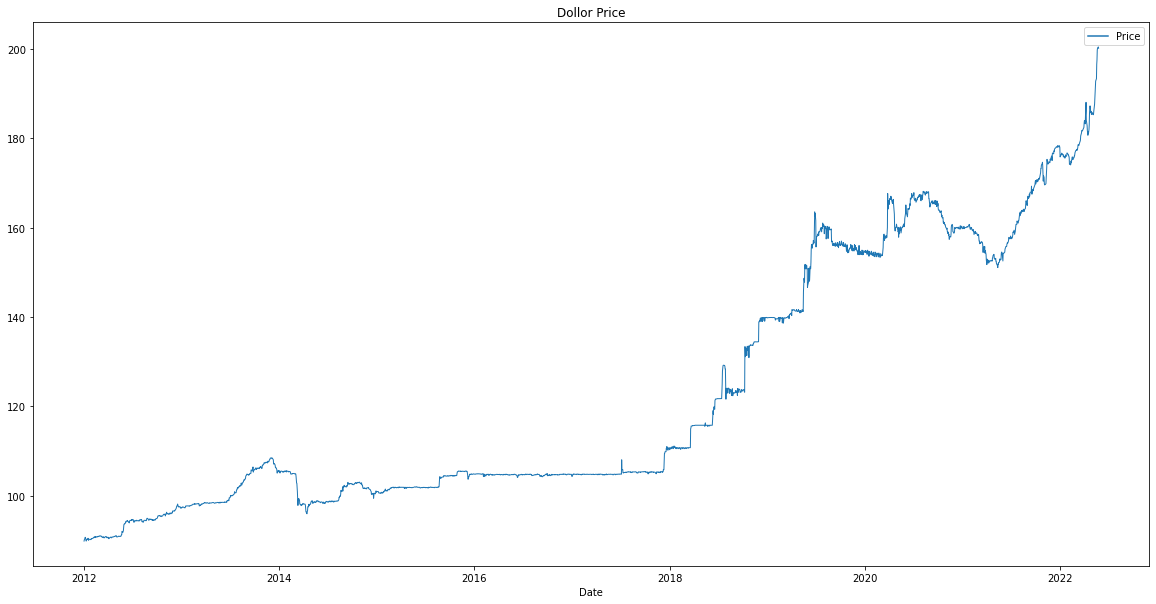

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, linewidth=1)
plt.title('Dollor Price')
plt.show()

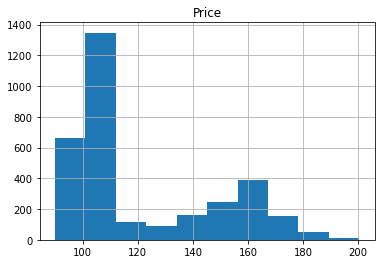

In [12]:
df.hist()
plt.show()

#The diagram defines, how frequent each value occurs 

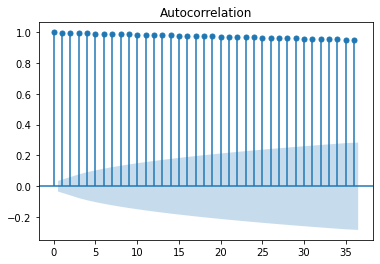

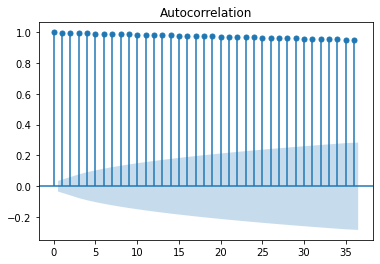

In [13]:
#Checking Stationary in data 

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [14]:
#AS in above graph we can see data is not stationary, It's increasing rapidly, stationary data must have constant mean, variance 
#and covariance over the period. We need to convert data in to stationary to perform time analysis.

In [15]:
price_diff = df.diff(periods=1)
price_diff

,Price
Date,
2012-01-02,NaN
2012-01-03,0.29
2012-01-04,0.14
2012-01-05,0.15
2012-01-06,0.25
...,...
2022-05-18,1.00
2022-05-19,2.20
2022-05-20,0.40


In [16]:
price_diff = price_diff[1:]

In [17]:
price_diff

,Price
Date,
2012-01-03,0.29
2012-01-04,0.14
2012-01-05,0.15
2012-01-06,0.25
2012-01-07,0.00
...,...
2022-05-18,1.00
2022-05-19,2.20
2022-05-20,0.40


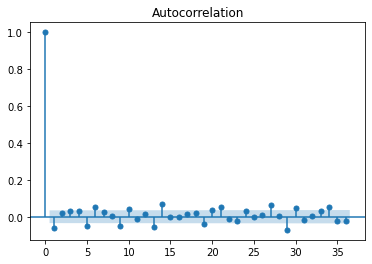

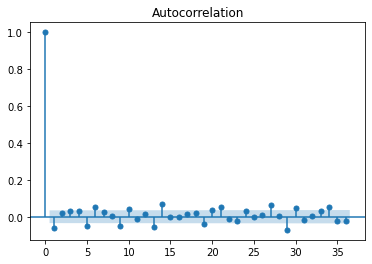

In [18]:
plot_acf(price_diff)

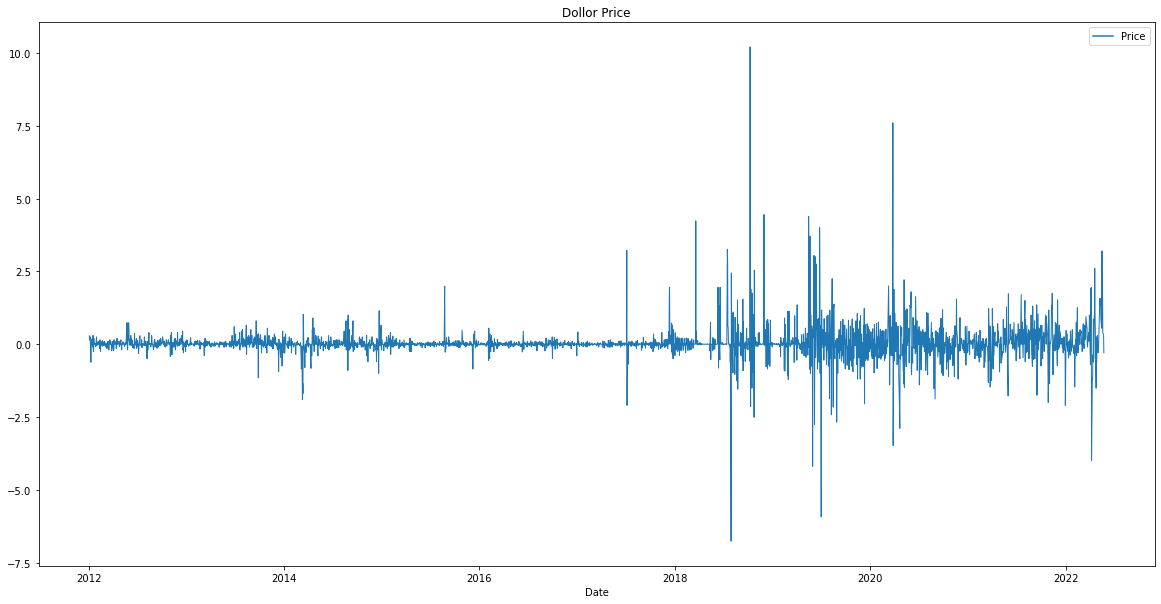

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(data=price_diff, linewidth=1)
plt.title('Dollor Price')
plt.show()

In [20]:
data = df
NumberOfElements = len(data)

#Use 70% of data as training, rest 30% to Test model
TrainingData = data.iloc[0:3000]
TestData = data.iloc[3000:]


        
# TestData

In [21]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

adf_test(price_diff['Price'])

1. ADF :  -7.981013537473451
2. P-Value :  2.623429979475406e-12
3. Num Of Lags :  29
4. Num Of Observations Used For ADF Regression: 3187
5. Critical Values :
	 1% :  -3.4324035220717977
	 5% :  -2.862447321137196
	 10% :  -2.5672529875723753


In [22]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(price_diff['Price'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7666.474, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6563.776, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7664.474, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6113.881, Time=0.63 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5881.883, Time=0.71 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5818.456, Time=0.91 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=5677.996, Time=1.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.69 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.80 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=5675.999, Time=0.60 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=5816.456, Time=0.47 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=2.38 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=1.94 s

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(TrainingData,order=(5,1,0))
model=model.fit()
print(model.summary())

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 2999
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2310.612
Method:                       css-mle   S.D. of innovations              0.523
Date:                Fri, 27 May 2022   AIC                           4635.224
Time:                        18:02:49   BIC                           4677.266
Sample:                             1   HQIC                          4650.347
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0238      0.009      2.803      0.005       0.007       0.041
ar.L1.D.Price    -0.0994      0.018     -5.453      0.000      -0.135      -0.064
ar.L2.D.Price    -0.0106      0.018     

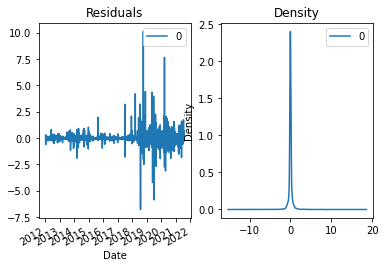

In [24]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

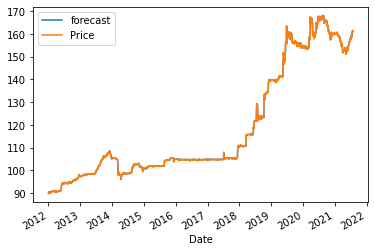

In [25]:
# start=len(TrainingData)
# end=len(TrainingData)+len(TestData)-1
# pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
# pred.plot(legend=True)
# TestData['Price'].plot(legend=True)
model.plot_predict(dynamic=False)
plt.show()


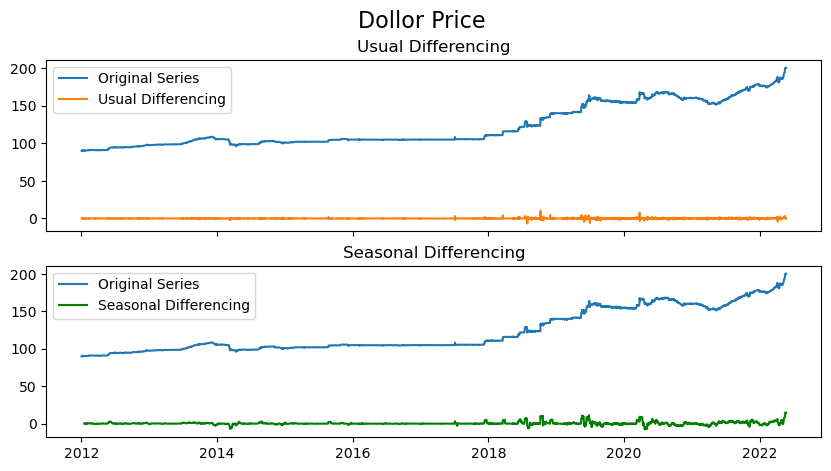

In [26]:

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df[:], label='Original Series')
axes[0].plot(df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df[:], label='Original Series')
axes[1].plot(df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Dollor Price', fontsize=16)
plt.show()

In [27]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=23.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13108.728, Time=0.27 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6373.103, Time=7.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10306.544, Time=6.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=13244.803, Time=0.24 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7255.993, Time=1.40 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6087.709, Time=27.12 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=101.95 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=37.26 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=13065.889, Time=9.64 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6086.403, Time=35.32 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=6373.142, Time=9.46 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=97.60 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=44.34 sec
 ARIMA(3,0,0)(2,1,0)[12] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3218
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -3037.202
Date:                            Fri, 27 May 2022   AIC                           6086.403
Time:                                    18:12:35   BIC                           6122.840
Sample:                                         0   HQIC                          6099.465
                                           - 3218                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0259      0.015      1.736      0.083      -0.003       0.055
ar.L1          0.9379      0.009    108.941      0.000       0.921       0.955
ar.L2          0.0323      0.008      3.833      0.000       0.016       0.049
ar.S.L12      -0.6593      0.006   -119.269      0.000      -0.670      -0.648
ar.S.L24      -0.3020      0.006    -52.893      0.000      -0.313      -0.291
sigma2         0.3884      0.002    188.474      0.000       0.384       0.392
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            353875.95
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              16.78   Skew:                             1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

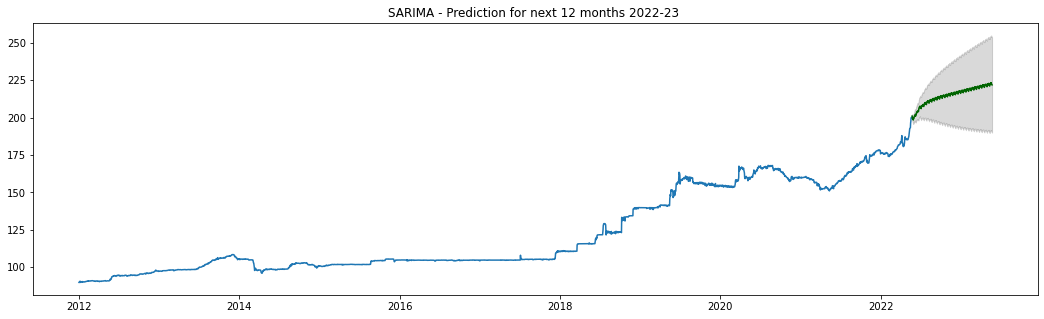

In [52]:
n_periods = 365
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods)


prediction = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(prediction, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.rcParams["figure.figsize"] = (18,5)
plt.title("SARIMA - Prediction for next 12 months 2022-23 ")
plt.show()

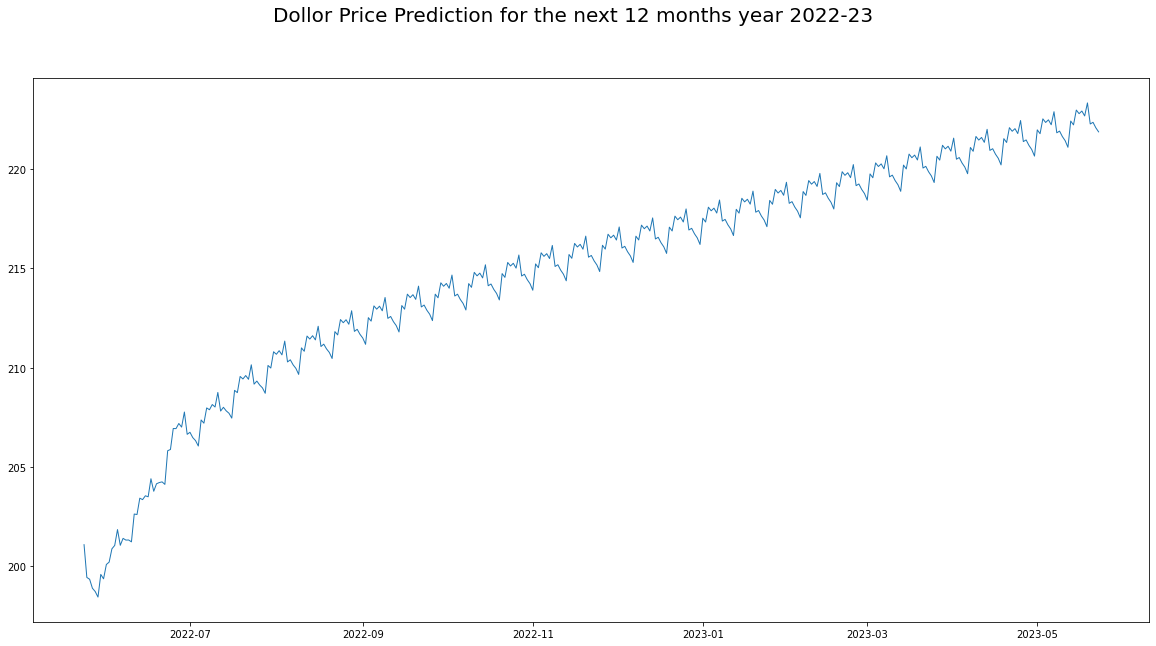

In [56]:
plt.figure(figsize=(20,10))
sns.lineplot(data=prediction, linewidth=1)
plt.suptitle('Dollor Price Prediction for the next 12 months year 2022-23', fontsize=20)
plt.show()

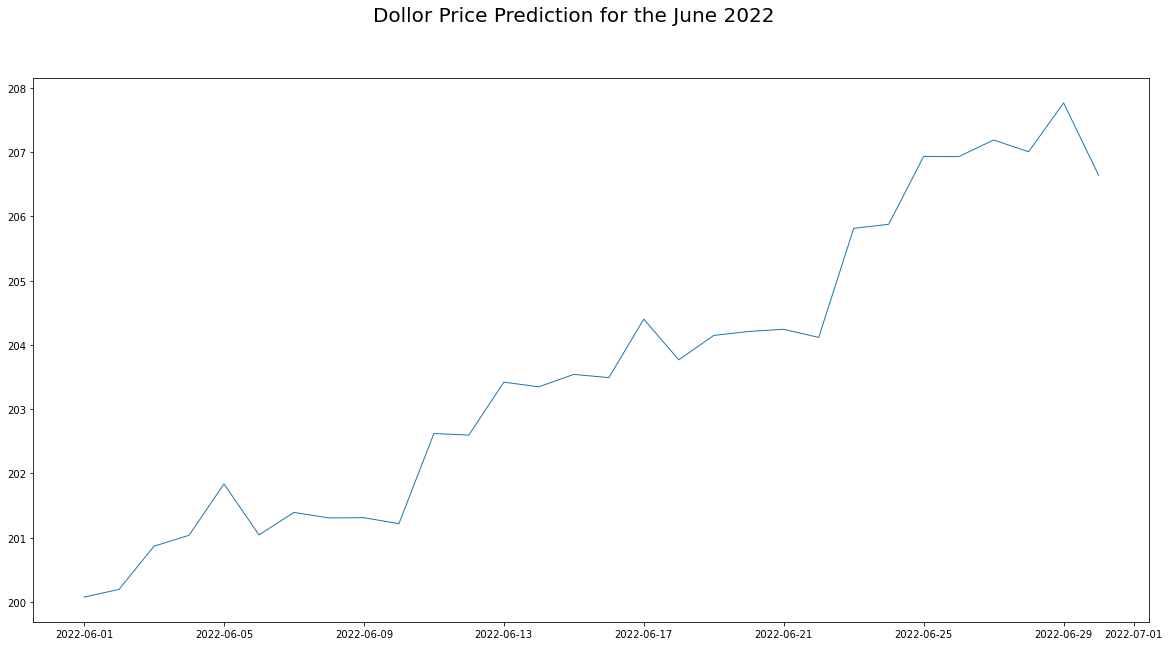

Dollor Price for month of june


2022-06-01    200.076743
2022-06-02    200.196380
2022-06-03    200.868832
2022-06-04    201.037540
2022-06-05    201.836759
2022-06-06    201.044399
2022-06-07    201.393908
2022-06-08    201.308064
2022-06-09    201.311830
2022-06-10    201.218222
2022-06-11    202.620511
2022-06-12    202.596661
2022-06-13    203.420165
2022-06-14    203.346893
2022-06-15    203.540804
2022-06-16    203.490284
2022-06-17    204.399956
2022-06-18    203.767363
2022-06-19    204.146743
2022-06-20    204.208399
2022-06-21    204.242085
2022-06-22    204.115619
2022-06-23    205.812547
2022-06-24    205.875714
2022-06-25    206.931839
2022-06-26    206.927715
2022-06-27    207.186034
2022-06-28    207.003881
2022-06-29    207.763472
2022-06-30    206.639056
Freq: D, dtype: float64

In [58]:
June = prediction[8:38]

plt.figure(figsize=(20,10))
sns.lineplot(data=June, linewidth=1)
plt.suptitle('Dollor Price Prediction for the June 2022', fontsize=20)
plt.show()

print("Dollor Price for month of june")
June


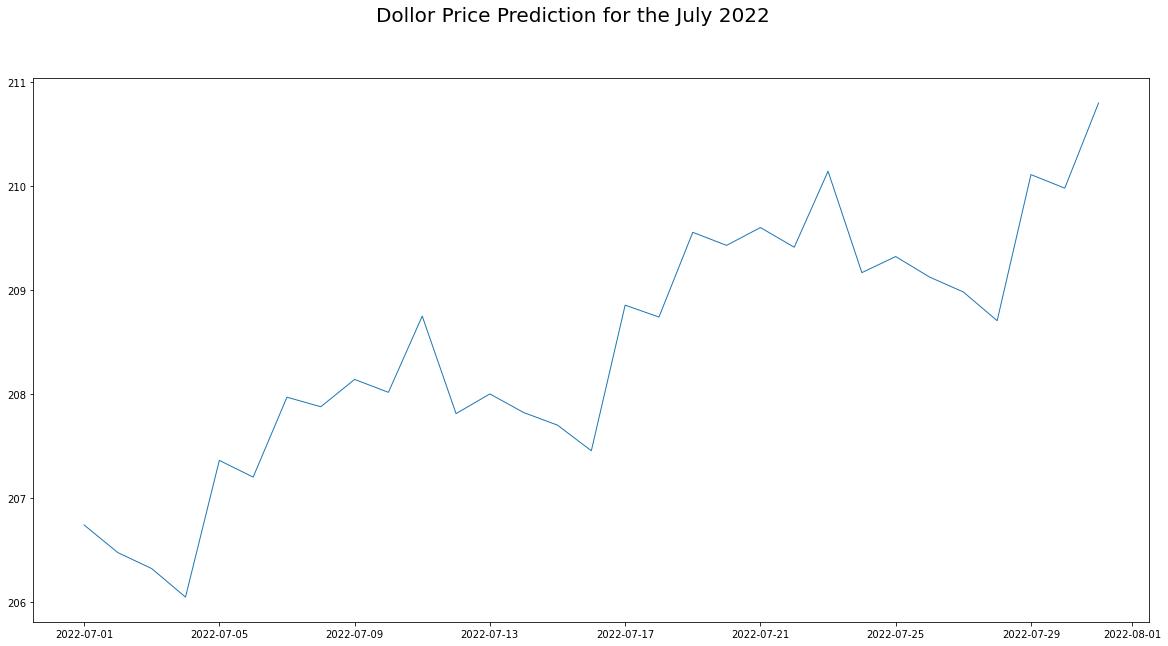

2022-07-01    206.742173
2022-07-02    206.475892
2022-07-03    206.322368
2022-07-04    206.048072
2022-07-05    207.362811
2022-07-06    207.202094
2022-07-07    207.970782
2022-07-08    207.878804
2022-07-09    208.141550
2022-07-10    208.017564
2022-07-11    208.750646
2022-07-12    207.812780
2022-07-13    208.002137
2022-07-14    207.823137
2022-07-15    207.702055
2022-07-16    207.455556
2022-07-17    208.855982
2022-07-18    208.741513
2022-07-19    209.556535
2022-07-20    209.430778
2022-07-21    209.602376
2022-07-22    209.412998
2022-07-23    210.144007
2022-07-24    209.168679
2022-07-25    209.323417
2022-07-26    209.126480
2022-07-27    208.982823
2022-07-28    208.706580
2022-07-29    210.111488
2022-07-30    209.981259
2022-07-31    210.801180
Freq: D, dtype: float64

In [60]:
July = prediction[38:69]

plt.figure(figsize=(20,10))
sns.lineplot(data=July, linewidth=1)
plt.suptitle('Dollor Price Prediction for the July 2022', fontsize=20)
plt.show()

July


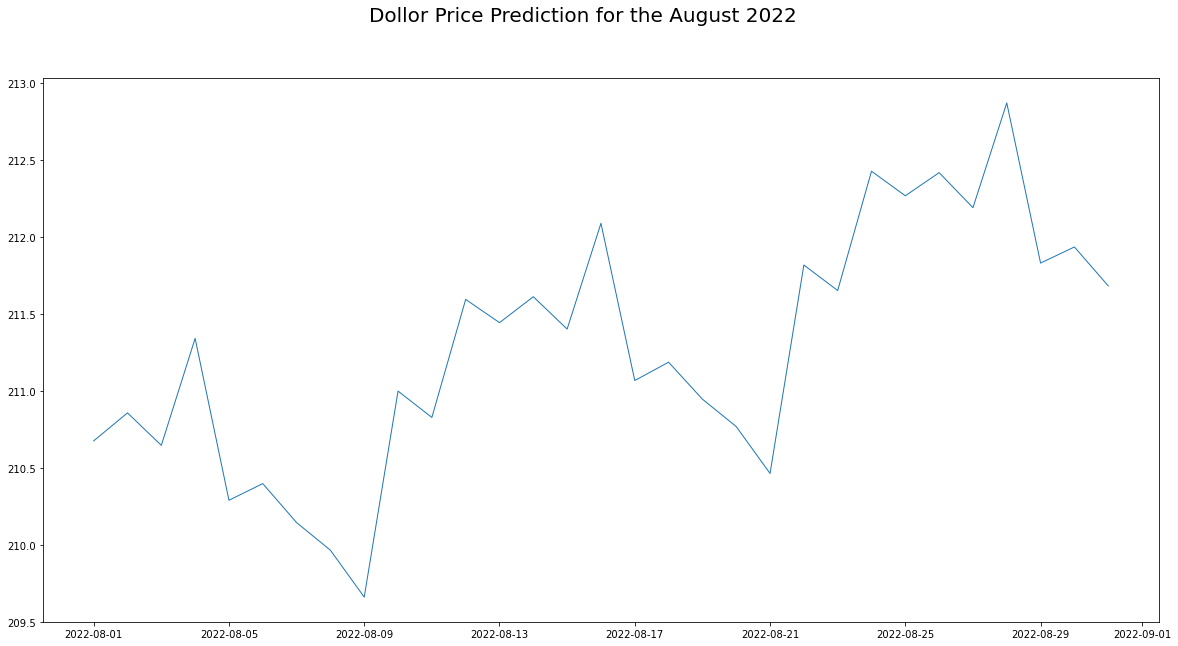

Dollor Price for month of August


2022-08-01    210.674341
2022-08-02    210.856245
2022-08-03    210.645355
2022-08-04    211.340036
2022-08-05    210.288679
2022-08-06    210.397086
2022-08-07    210.143746
2022-08-08    209.964510
2022-08-09    209.659987
2022-08-10    210.997704
2022-08-11    210.826644
2022-08-12    211.593160
2022-08-13    211.442095
2022-08-14    211.610602
2022-08-15    211.400496
2022-08-16    212.087559
2022-08-17    211.066373
2022-08-18    211.185412
2022-08-19    210.945181
2022-08-20    210.767573
2022-08-21    210.462856
2022-08-22    211.816497
2022-08-23    211.650873
2022-08-24    212.425630
2022-08-25    212.266109
2022-08-26    212.416293
2022-08-27    212.188816
2022-08-28    212.869194
2022-08-29    211.829052
2022-08-30    211.933682
2022-08-31    211.681066
Freq: D, dtype: float64

In [62]:
August = prediction[69:100]


plt.figure(figsize=(20,10))
sns.lineplot(data=August, linewidth=1)
plt.suptitle('Dollor Price Prediction for the August 2022', fontsize=20)
plt.show()

print("Dollor Price for month of August")
August
